# Lecture #3

## Problem 5: Infinite Precision Calculations and Machine Parameters

One needs to be very careful while doing infinite precision calculations as these require a lot of memory, and we might get round-off errors (this are machine errors rather than human errors). There are also certain numbers called machine parameters that define machine precision. Find the following machine parameters (start with 1 and keep on dividing by 2)

 1. `eps`: smallest floating point number that, added to 1, gives something different from 1. Also find the largest floating point number that, added to 1,  gives 1.
 2. `xmin`: smallest floating point number not equal to 0.  Also find the largest floating point number that is still zero. Convert these numbers to powers of 10.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [9]:
eps = 1
while eps + 1 != 1:
    eps /= 2
print(eps) # this is our epsilon (smallest floating point number defined by the machine)

1.1102230246251565e-16


In [11]:
ver_eps = sys.float_info.epsilon
print(ver_eps) # to verify -- here, we can see that the order of magnitude matches

2.220446049250313e-16


In [ ]:
leps = 0.1
while leps + 1 != 1:
    leps *= 2
print(leps) # this is the largest floating point number which when added to 1 gives 1 --> takes a long time to execute

### Floating Point Numbers

A floating point number in Python has three components: the **sign bit** *S*, the **exponent** *E* (11 bits) and the **mantissa** *F* (52 bits). The implicit leading 1 in normalised numbers makes the effective significand 53 bits for the mantissa. The number of bits defined here are for double-precision floating point numbers. The standard normalised form for these numbers is:

$(-1)^S \times 2^{E - 1023} \times (1.F)$

We have denormalised/un-normalised numbers occur *E* = 0, and instead of the implicit leading `1` in the significand, we assume `0`, making the form:

$(-1)^S \times 2^{-1022} \times (0.F)$

The smallest positive subnormal number occurs when *F* = 0, which gives:

$2^{-1022} \times 2^{-52} = 2^{-1074}$

The machine would automatically assume the denormalised form when we have a number like 0.000....1

Python uses IEEE 754 double-precision floating-point numbers. IEEE 754 also has subnormal numbers, which are very small (they are non-zero numbers with magnitudes smaller than the smallest possible normal number). These numbers are denormalised numbers. The smallest subnormal positive floating point number can be found as shown below.

In [17]:
print(np.nextafter(0, 1))

5e-324


On the other hand, the smallest normal/normalised floating point number can be found as follows:

In [18]:
xmin = sys.float_info.min  # smallest normal positive float
print(xmin)

2.2250738585072014e-308


## Problem 6: Stability Problems

Evaluate

1. $f_1(x) = \sqrt{1 + x^{2}} - 1$ for small values of $x$ like $10^{-n}$ for different values of $n > 0$. Where to expect a problem and how to evaluate for even smaller values?
2. $f_2(z) = (1 - \cos{z})/\sin{z}$ for $z$ in the range $-\pi$ to $+\pi$.

<hr>

### Some remarks:

Here, we have these two functions. When the machine loses precision, we shift to this approximation:

$\sqrt{1 + x^{2}} - 1 = 1 + \frac{x^{2}}{2} - \frac{x^{4}}{8} + ... - 1 = \frac{x^{2}}{2} - \frac{x^{4}}{8} + ...$

So, $f_{1}$ is only valid for $x^{2} > \eta$, some small number we're defining such that if $x > \sqrt{\eta}$, $f_{1}(x) = \sqrt{1 + x^{2}} - 1$, else $f_{1}(x) = \frac{x^{2}}{2} - \frac{x^{4}}{8} + ...$

For the second function, we can do a loop over $\theta$ from $-\pi$ to $+\pi$ and evaluate. We can also use l'Hopital's rule to approximate as we will have a division by zero error. This, however, is bad for computation. So, we can alternatively use the trigonometric identity:

$f_{2}(\theta) = \frac{1 - \cos{\theta}}{\sin{\theta}} = \frac{1 - \cos^{2}{\theta}}{\sin{\theta}(1 + \cos{\theta})} = \frac{\sin{\theta}}{1 + \cos{\theta}}$

This seems like it is valid everywhere, but it is not. If $\theta = \frac{3\pi}{2}$, we will have 0 in the denominator.

If we want a larger range (say $-2\pi$ to $+2\pi$), we need to use piecewise functions -- we change the form of the function and use those different forms in different regions. This has nothing to do with machine precision.

In [40]:
# function 1
def f1(x):
    return np.sqrt(1 + x**2) - 1

# stable version
def f1_stable(x):
    return x**2/(np.sqrt(1 + x**2) + 1)
    
# function 2
def f2(z):
    return (1 - np.cos(z))/np.sin(z)

# stable version
def f2_stable(z):
    return np.sin(z)/(1 + np.cos(z))

As mentioned earlier, we encounter a stability problem in the first function as significant digits are lost due to subtraction of nearly equal numbers. So, a more stable alternative would be $\frac{x^{2}}{\sqrt{1 + x^{2}} + 1}$ as it avoids subtraction.

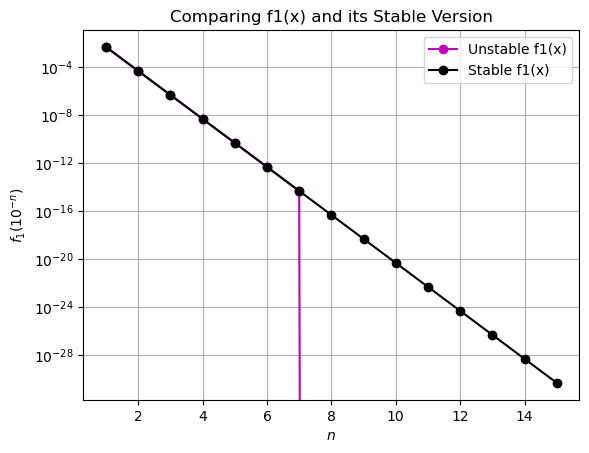

In [41]:
n_values = np.arange(1, 16)
x_values = 10.0**-n_values

f1_values = f1(x_values)
f1_stable_values = f1_stable(x_values)

# comparing both
plt.plot(n_values, f1_values, 'mo-', label = 'Unstable f1(x)')
plt.plot(n_values, f1_stable_values, 'ko-', label = 'Stable f1(x)')
plt.yscale('log')
plt.xlabel('$n$')
plt.ylabel('$f_1(10^{-n})$')
plt.title('Comparing f1(x) and its Stable Version')
plt.legend()
plt.grid()
plt.show()

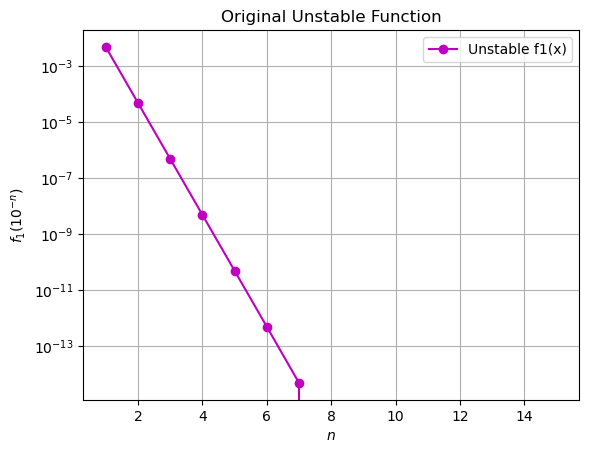

In [42]:
plt.plot(n_values, f1_values, 'mo-', label = 'Unstable f1(x)')
plt.yscale('log')
plt.xlabel('$n$')
plt.ylabel('$f_1(10^{-n})$')
plt.title('Original Unstable Function')
plt.legend()
plt.grid()
plt.show()

For second function, when we have small z, we risk division by very small values, and this leads to numerical instability. So, we use the trigonometric identity defined earlier for the stable version.

In [46]:
z_values = np.linspace(-np.pi, np.pi, 400)
f2_values = f2(z_values)
f2_stable_values = f2_stable(z_values)

/tmp/ipykernel_3553/3892581724.py:15: RuntimeWarning: divide by zero encountered in divide
  return np.sin(z)/(1 + np.cos(z))


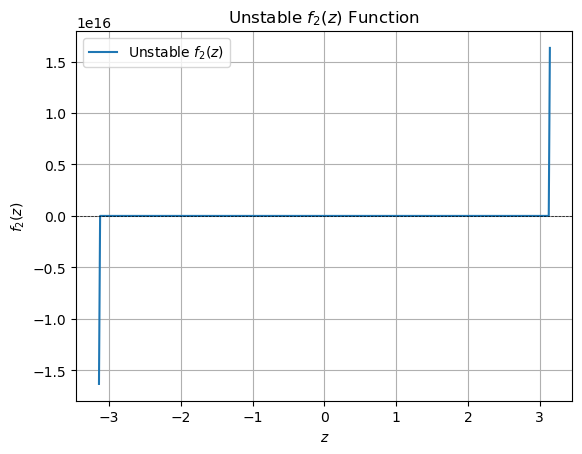

In [52]:
plt.plot(z_values, f2_values, label = r'Unstable $f_2(z)$')
plt.xlabel(r'$z$')
plt.ylabel(r'$f_2(z)$')
plt.title(r'Unstable $f_{2}(z)$ Function')
plt.axhline(0, color = 'k', linestyle = '--', linewidth = 0.5)
plt.grid()
plt.legend()
plt.show()

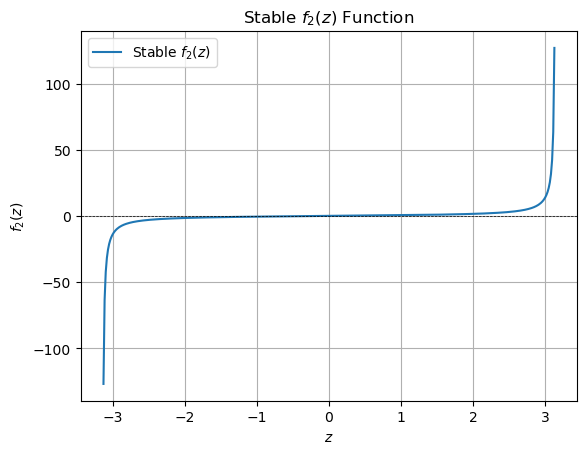

In [53]:
plt.plot(z_values, f2_stable_values, label = r'Stable $f_2(z)$') # this is a nicer and smoother function
plt.xlabel(r'$z$')
plt.ylabel(r'$f_2(z)$')
plt.title(r'Stable $f_{2}(z)$ Function')
plt.axhline(0, color = 'k', linestyle = '--', linewidth = 0.5)
plt.grid()
plt.legend()
plt.show()

## Problem 7: Bisection Method

Use the bisection method to solve for x: $f(x) = x^2 - c = 0$ with $c > 0$ (or some other function, say, $\cos{x} = 0$ for $x$ in the range $\pi/4$ to $3\pi/4$). Choose a precision epsilon and count the number of steps required to reach that precision, for example, $\epsilon = 10^{-n}$ with $n = 3, 4, ..., 10$.

<hr>

### What is the Bisection Method?

Say we have $x^{2} - c = 0$ and we want to find $x$. Graphically, we can define an upper (*U*) and a lower limit (*L*). If $f(L) < 0$ and $f(U) > 0$, then let $x_{0} \in \left[x_{1}, x_{2}\right]$. So, by intermediate value theorem, we have a root between $L$ and $U$. We can define the precision $\epsilon$ such that $|x_{2} - x_{1}| < \epsilon$. Now, we can *bisect* the interval by calculating the midpoint $t = \frac{L + U}{2}$. 

If $f(t) = 0$, then $t$ is the root, and we are done! But say we have $f(t) > 0$. Then the root must be on the left of $t$ so we set the upper limit as $U = t$ and our new range becomes $(L, t)$. If $f(t) < 0$, we can change the lower limit such that $L = t$ and we have the range $(t, U)$. This process keeps repeating until the difference between the upper and lower bounds is smaller than $\epsilon$ (precision).

In [59]:
def bisection(f, L, U, eps, max_iter = 100):
    # if f(L) * f(U) > 0:
    #     raise ValueError('f(L) and f(U) must have opposite signs.')

    count = 0 # no of steps
    while (U - L) > eps and count < max_iter:
        t = (L + U) / 2 
        if f(t) == 0:
            return t, count
        elif f(t) * f(L) < 0:
            U = t  # root is in [L, t]
        else:
            L = t  # root is in [t, U]
        count += 1

    return (L + U)/2, count

In [62]:
c = 2
f = lambda x: x**2 - c
L, U = 0, c

for n in range(3, 11):
    eps = 10**-n
    root, iterations = bisection(f, L, U, eps)
    print(f'Epsilon: 10^(-{n}), x: {root:.{n}f}, Steps: {iterations}')

Epsilon: 10^(-3), x: 1.415, Steps: 11
Epsilon: 10^(-4), x: 1.4142, Steps: 15
Epsilon: 10^(-5), x: 1.41421, Steps: 18
Epsilon: 10^(-6), x: 1.414214, Steps: 21
Epsilon: 10^(-7), x: 1.4142136, Steps: 25
Epsilon: 10^(-8), x: 1.41421356, Steps: 28
Epsilon: 10^(-9), x: 1.414213562, Steps: 31
Epsilon: 10^(-10), x: 1.4142135624, Steps: 35


As we go towards a smaller epsilon, we get more precise values of the root $\sqrt{2}$!